# Experiment 1 - Common use case, optimizing N threads

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [2]:
machine    = "spa"
kernel1     = "cpu"
size1       = "small"
kernel2     = "cpu"
size2       = "large"
randomised = False

In [3]:
if machine == "spa":
    number_of_tests = 1296
    num_workers_max = 24
    num_cores_max   = 24
    greater_than_threshold = 12

elif machine == "XXXII":
    number_of_tests = 576
    num_workers_max = 48
    num_cores_max   = 48
    greater_than_threshold = 32
    
# if randomised == True:
#     folder_path1 = "results/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_" + kernel2 + "_" + size2 + "_randomised/"
#     graph_path   = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_" + kernel2 + "_" + size2 + "_randomised.png"
    
# else:
folder_path1 = "results/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + "_1/"
folder_path2 = "results/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + "_2/"
graph_path   = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + ".png"

Set files to read

In [4]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

Import the dataset

In [32]:
data1 = []
data2 = []
        
fetch_data(folder_path1, file_names, data1, ["Runtime"])
fetch_data(folder_path2, file_names, data2, ["Runtime"])
        
dataset = []

num_workers_min = 4
num_workers_step = 4
num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
nwv_len = len(num_workers_values)
num_workers = num_workers_values[0]

num_cores_min = 4
num_cores_step = 4
num_cores_values = range(num_cores_min, num_cores_max + num_cores_step, num_cores_step)
ncv_len = len(num_cores_values)
num_cores = num_cores_values[0]

for i in range(len(data1)):
    num_workers1 = num_workers_values[i % nwv_len]
    num_cores1 = num_cores_values[(i // nwv_len) % ncv_len]
    num_workers2 = num_workers_values[((i // nwv_len) // ncv_len) % nwv_len]
    num_cores2 = num_cores_values[(((i // nwv_len) // ncv_len) // nwv_len) % ncv_len]
    
#     dataset.append(["cpu", "small", num_cores1, num_workers1, data1[i][1:].mean()[0]])
#     dataset.append(["cpu", "large", num_cores2, num_workers2, data2[i][1:].mean()[0]])
    dataset.append([num_cores1, num_workers1, num_cores2, num_workers2, data1[i][1:].mean()[0] + data2[i][1:].mean()[0]])

dataset = pd.DataFrame(dataset)
# dataset.columns = ["Workload Type", "Size", "Num Cores", "Num Workers", "Runtime"]
dataset.columns = ["Num Cores 1", "Num Workers 1", "Num Cores 2", "Num Workers 2", "Total Runtime"]

In [33]:
min_dataset = dataset[dataset["Total Runtime"] == min(dataset["Total Runtime"])]

min_dataset

,Num Cores 1,Num Workers 1,Num Cores 2,Num Workers 2,Total Runtime
970,24,20,20,12,55.78


/home/mark/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  # This is added back by InteractiveShellApp.init_path()


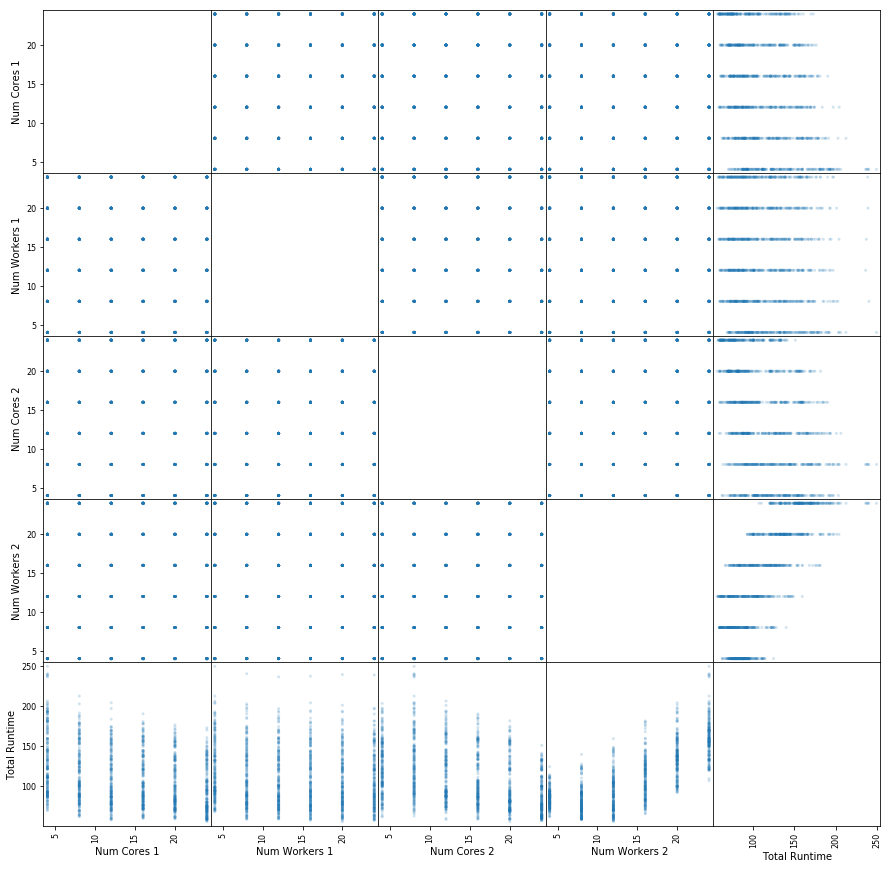

In [34]:
# sns.factorplot(x="Num Workers", y="Time",
#                hue="Num Cores",
#                col="Num Cores Greater Than Physical Cores",
#                size=10,
#                data=dataset);

# sns.regplot(x="Total Runtime", y="Num Cores 1", data=dataset)

from pandas.tools.plotting import scatter_matrix

scatter_matrix(dataset, alpha=0.2, figsize=(15, 15), diagonal='Total Runtime')

plt.savefig(graph_path)
plt.show()